In [1]:
# Mount the Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import Flatten, Dense, Dropout
from keras import Sequential

### Import the Dataset

In [5]:
# Read the Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cs587/assignment4/spam.csv')

# Display the Shape of the Dataset
print('Data shape', dataset.shape)

# Display the First 10 Messages in Dataset
dataset.head(10)

Data shape (5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
# Display fully the first few messages (can you guess which one is spam without looking at the label?)
print(dataset.iloc[0,1])
print(dataset.iloc[1,1])
print(dataset.iloc[2,1])
print(dataset.iloc[3,1])
print(dataset.iloc[5,1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv


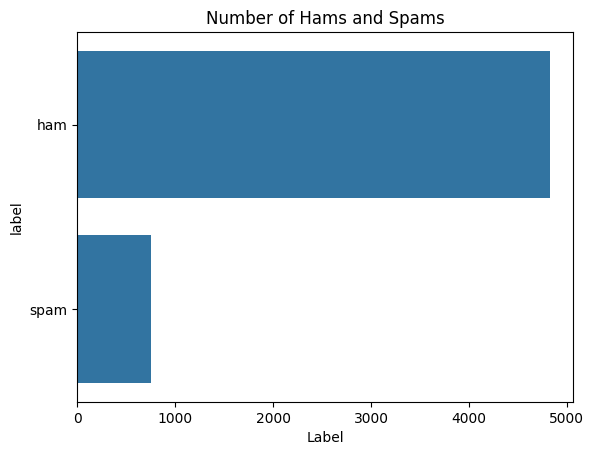

In [7]:
# Plot the Distribution of Labels
sns.countplot(dataset['label'])
plt.xlabel("Label")
plt.title('Number of Hams and Spams')
plt.show()

### Step1:  Create Train and Test Datasets

In [8]:
# Extract Data and Labels
data =  dataset['text']
labels = dataset['label']

# Encode labels into 0 for ham and 1 for spam
print("Before Encoding: ", labels.value_counts())
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print("After Encoding: ", np.bincount(labels))
labels = np.expand_dims(labels,axis=-1)

# Display the data and label shape
print('Data shape', data.shape)
print('Labels shape:',labels.shape)

Before Encoding:  label
ham     4825
spam     747
Name: count, dtype: int64
After Encoding:  [4825  747]
Data shape (5572,)
Labels shape: (5572, 1)


In [9]:
# Split into Train Datasets and Test Datasets
data_train, data_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123, stratify=labels)

In [10]:
# Display the Shapes of Train Datasets and Test Datasets
print(f'data_train shape: {data_train.shape}\ty_train shape: {y_train.shape}')
print(f'data_test shape: {data_test.shape}\ty_test shape: {y_test.shape}')

data_train shape: (4457,)	y_train shape: (4457, 1)
data_test shape: (1115,)	y_test shape: (1115, 1)


#### Convert the words into numerical tokens using Tokenizer in Keras

In [11]:
# Maximum Number of Words
max_words = 1000

# Define the Tokenize, and Fit Tokenizer on Train Data
tokenizer = Tokenizer(num_words=max_words, oov_token='Word Out of Vocab')
tokenizer.fit_on_texts(data_train)

# Convert Train Data and Test Data to Tokenized Sequences
data_train_tknd = tokenizer.texts_to_sequences(data_train)
data_test_tknd = tokenizer.texts_to_sequences(data_test)

# Print the First Sample in Train Data
print("First Sample in Training Data: \n", data_train_tknd[0])
print("First Sample in Test Data: \n", data_test_tknd[0])

First Sample in Training Data: 
 [11, 35, 25, 1, 402, 2, 30, 297]
First Sample in Test Data: 
 [25, 1, 1, 476, 44, 1, 1, 112]


#### Pad the tokenized sequences to a fixed length

In [12]:
# Maximum length of sequences
max_len = 150

# Pad Train Data and Test Data to the Same Length
data_train_padded = pad_sequences(data_train_tknd, maxlen=max_len)
data_test_padded = pad_sequences(data_test_tknd, maxlen=max_len)

# Print the First Sample in Train Data
print("First Sample in Training Data: \n", data_train_padded[0])
print("First Sample in Test Data: \n", data_test_padded[0])

First Sample in Training Data: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11  35
  25   1 402   2  30 297]
First Sample in Test Data: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0

In [13]:
# Display the Shapes of Train Datasets and Test Datasets
print(f'data_train shape: {data_train_padded.shape}\ty_train shape: {y_train.shape}')
print(f'data_test shape: {data_test_padded.shape}\ty_test shape: {y_test.shape}')


data_train shape: (4457, 150)	y_train shape: (4457, 1)
data_test shape: (1115, 150)	y_test shape: (1115, 1)


### Step2: Train a Deep Learning Model

#### Define a Keras model with Embedding and Dense layers

In [14]:
# Maximum number of words
input_dim = max_words
# Embedding dimension
embedding_dim = 8
# Maximum length of sequences
input_length = max_len

# Create a model
model = Sequential([
       Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=input_length),
       Flatten(),
       Dense(32, activation='relu'),
       Dropout(0.5),
       Dense(1, activation='sigmoid')
])

#### Compile and fit the model on the training data

In [15]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            8000      
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 32)                38432     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46465 (181.50 KB)
Trainable params: 46465 (181.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the Model
history = model.fit(data_train_padded, y_train, validation_split=0.2, epochs=3)

Epoch 1/3
112/112 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8659 - val_loss: 0.2320 - val_accuracy: 0.8543
Epoch 2/3
112/112 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.8959 - val_loss: 0.1719 - val_accuracy: 0.9540
Epoch 3/3
112/112 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9722 - val_loss: 0.1487 - val_accuracy: 0.9630


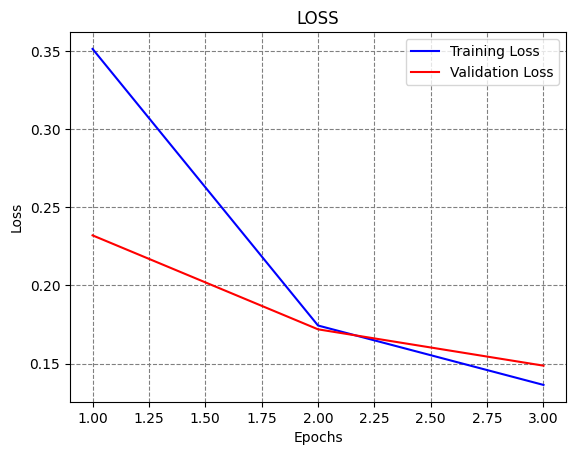

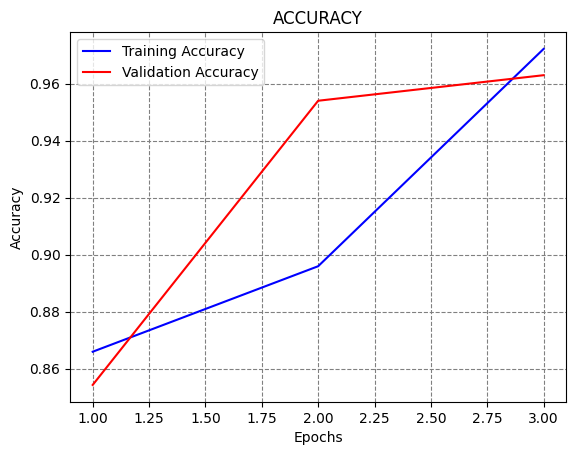

In [ ]:
# Plot the Loss and Accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#### Evaluate the model performance on test dataset

In [ ]:
# Evaluate the Model on Test Data

acc = model.evaluate(data_test_padded, y_test)
print("Classification Accuracy: ", acc[1])

35/35 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9803
Classification Accuracy:  0.9802690744400024


#### Evaluate the model on the following sentences

In [ ]:
# Sample of four new tweets
sample_tweets = ['You won an award cruise trip, call to claim it', 'Free apple phones on us for our customers, call immediately', 'I read a great book yesterday', 'March Madness has been fun this year']

# Tokenize and pad the tokenized sample tweets
sample_tweets_tkd = tokenizer.texts_to_sequences(sample_tweets)
sample_tweets_padded = pad_sequences(sample_tweets_tkd, maxlen=max_len)
print("First Sample Tweets after Tokenized and Padded: ", sample_tweets_padded[0])

# make predictions on the sample tweets
preds_sample_tweets = np.argmax(model.predict(sample_tweets_padded), axis=1)
print("Predicted Labels of Sample Tweets: ", preds_sample_tweets)

First Sample Tweets after Tokenized and Padded:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 178 127 386
   1 568  17   3 129  15]
1/1 [==============================] - 0s 18ms/step
Predicted Labels of Sample Tweets:  [0 0 0 0]
